In [ ]:
!pip install kaggle

In [ ]:
#configure the path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#fetch the dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extracting the dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('File Extracted')

File Extracted


In [ ]:
!ls

 data			'mask and without.jpg'	 sample_data   without_mask1.jpg
 face-mask-dataset.zip	 mask.jpg		 without.jpg


In [ ]:
#import the dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1965.jpg', 'with_mask_3343.jpg', 'with_mask_2793.jpg', 'with_mask_933.jpg', 'with_mask_1561.jpg']
['with_mask_2645.jpg', 'with_mask_1847.jpg', 'with_mask_2484.jpg', 'with_mask_1180.jpg', 'with_mask_1636.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1332.jpg', 'without_mask_743.jpg', 'without_mask_1645.jpg', 'without_mask_1681.jpg', 'without_mask_2161.jpg']
['without_mask_2043.jpg', 'without_mask_2144.jpg', 'without_mask_3710.jpg', 'without_mask_1231.jpg', 'without_mask_682.jpg']


In [ ]:
print('Number of with mask files:',len(with_mask_files))
print('Number of with mask files:',len(without_mask_files))

Number of with mask files: 3725
Number of with mask files: 3828


In [ ]:
#create labels for each classes of labels
#with_mask--> 1
#without_mask---> 0

with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels=with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


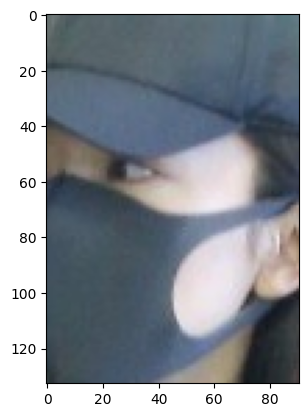

In [ ]:
#displaying the images
img=mpimg.imread('/content/data/with_mask/with_mask_421.jpg')
imgplot=plt.imshow(img)
plt.show()

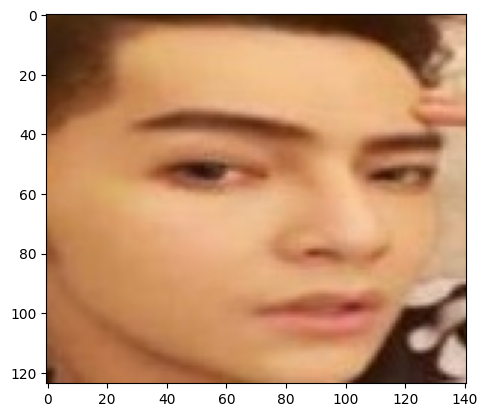

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_3243.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#image processing
#convert the images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)





/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[187, 170, 142],
        [194, 177, 149],
        [197, 180, 153],
        ...,
        [255, 253, 249],
        [255, 254, 251],
        [250, 255, 255]],

       [[181, 162, 135],
        [187, 168, 141],
        [192, 175, 149],
        ...,
        [255, 253, 249],
        [255, 254, 251],
        [250, 255, 255]],

       [[190, 169, 142],
        [193, 173, 146],
        [196, 177, 151],
        ...,
        [255, 253, 249],
        [255, 254, 251],
        [250, 255, 255]],

       ...,

       [[120, 119, 132],
        [118, 117, 131],
        [109, 107, 124],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[113, 115, 131],
        [109, 110, 124],
        [ 98,  99, 112],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 97, 101, 120],
        [ 85,  89, 104],
        [ 78,  81,  90],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
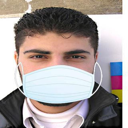

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image lists and label lists to numpy array

x=np.array(data)
y=np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling the data

x_train_scaled = x_train/255
x_test_scaled = x_test/255

array([[[ 73,  65,  62],
        [ 74,  67,  64],
        [ 77,  69,  66],
        ...,
        [ 80,  78,  83],
        [ 81,  79,  84],
        [ 82,  80,  85]],

       [[ 70,  62,  59],
        [ 71,  63,  60],
        [ 74,  65,  62],
        ...,
        [ 76,  74,  79],
        [ 79,  77,  82],
        [ 80,  78,  83]],

       [[ 67,  59,  57],
        [ 66,  58,  56],
        [ 68,  60,  58],
        ...,
        [ 73,  68,  74],
        [ 78,  73,  78],
        [ 81,  76,  80]],

       ...,

       [[225, 193, 168],
        [224, 193, 168],
        [224, 192, 167],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 255]],

       [[225, 194, 166],
        [224, 194, 166],
        [224, 192, 164],
        ...,
        [253, 253, 253],
        [253, 253, 254],
        [253, 253, 255]],

       [[227, 196, 168],
        [226, 195, 167],
        [225, 193, 165],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 255]]], dtype=uint8)
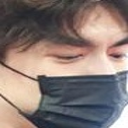

In [ ]:
x_train[0]

In [ ]:
x_train_scaled[0]

array([[[0.28627451, 0.25490196, 0.24313725],
        [0.29019608, 0.2627451 , 0.25098039],
        [0.30196078, 0.27058824, 0.25882353],
        ...,
        [0.31372549, 0.30588235, 0.3254902 ],
        [0.31764706, 0.30980392, 0.32941176],
        [0.32156863, 0.31372549, 0.33333333]],

       [[0.2745098 , 0.24313725, 0.23137255],
        [0.27843137, 0.24705882, 0.23529412],
        [0.29019608, 0.25490196, 0.24313725],
        ...,
        [0.29803922, 0.29019608, 0.30980392],
        [0.30980392, 0.30196078, 0.32156863],
        [0.31372549, 0.30588235, 0.3254902 ]],

       [[0.2627451 , 0.23137255, 0.22352941],
        [0.25882353, 0.22745098, 0.21960784],
        [0.26666667, 0.23529412, 0.22745098],
        ...,
        [0.28627451, 0.26666667, 0.29019608],
        [0.30588235, 0.28627451, 0.30588235],
        [0.31764706, 0.29803922, 0.31372549]],

       ...,

       [[0.88235294, 0.75686275, 0.65882353],
        [0.87843137, 0.75686275, 0.65882353],
        [0.87843137, 0

In [ ]:
#Building CNN

import tensorflow as tf
from tensorflow import keras

In [ ]:
no_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes, activation='sigmoid'))

In [ ]:
#compile the neural network

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])



In [ ]:
#training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 23ms/step - loss: 0.4284 - acc: 0.8148 - val_loss: 0.2496 - val_acc: 0.8992
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2770 - acc: 0.8895 - val_loss: 0.2151 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2168 - acc: 0.9110 - val_loss: 0.1793 - val_acc: 0.9289
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1863 - acc: 0.9257 - val_loss: 0.1710 - val_acc: 0.9289
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1546 - acc: 0.9408 - val_loss: 0.1494 - val_acc: 0.9421


In [ ]:
#model evaluation

loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test accuracy=', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.1935 - acc: 0.9259
Test accuracy= 0.9258769154548645


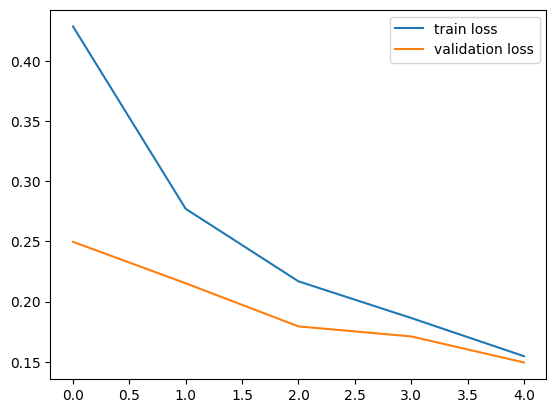

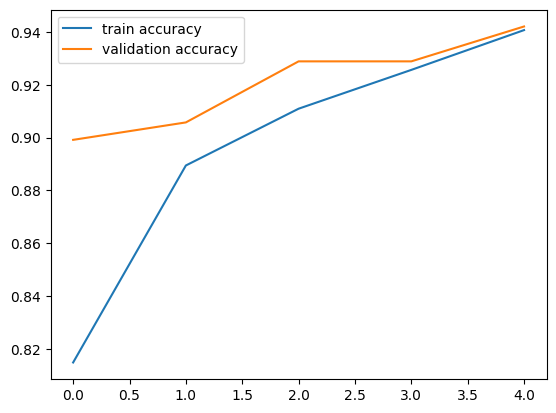

In [ ]:
h = history

#plot the loss value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/mask.jpg


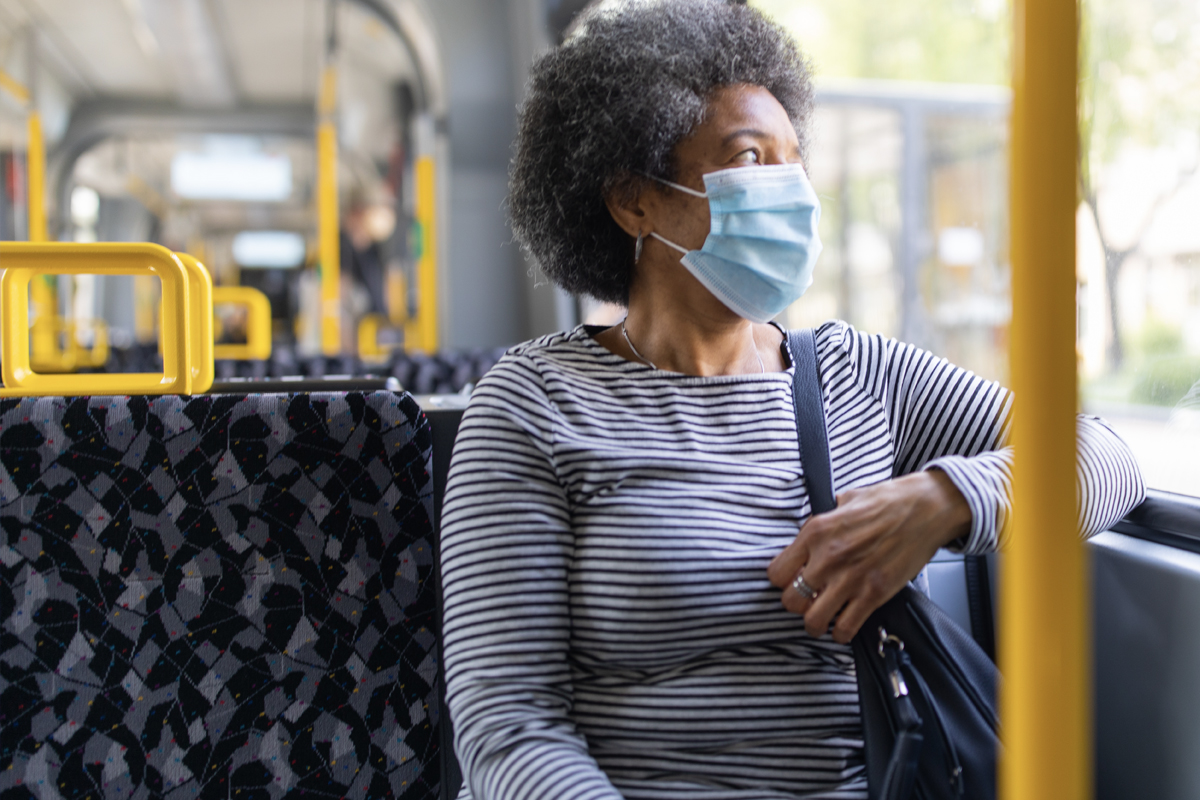

1/1 [==============================] - 0s 432ms/step
[[0.1666877  0.80381227]]
1
The Person is wearing mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image =cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label ==1:
  print('The Person is wearing mask')
else:
  print('The person is not wearing the mask')

Path of the image to be predicted: /content/without_mask1.jpg


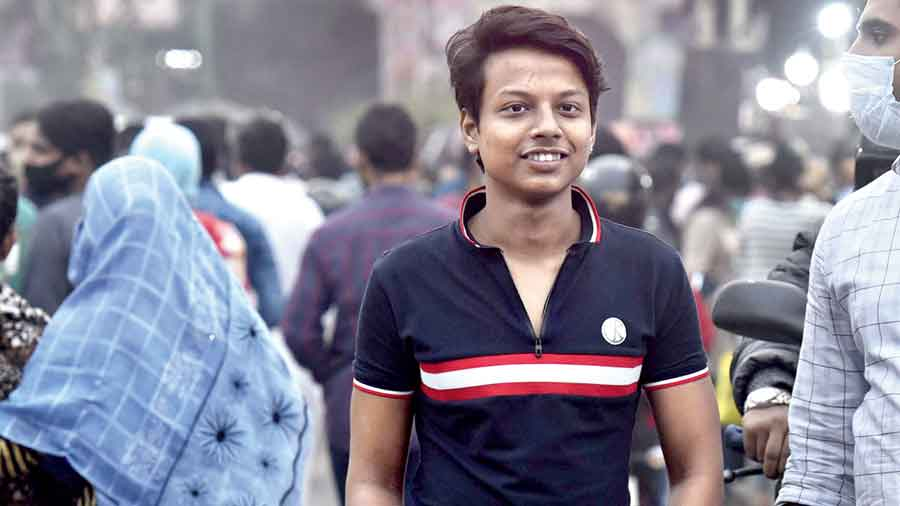

1/1 [==============================] - 0s 26ms/step
[[0.5332892  0.50128067]]
0
The person is not wearing the mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image =cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label ==1:
  print('The Person is wearing mask')
else:
  print('The person is not wearing the mask')

In [ ]:
model.save('face_mask_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
